# Exploratory Data Analysis - Retail

## by Priyanshi Khanna

In [116]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
d=pd.read_csv("SampleSuperstore.csv")
df=pd.DataFrame(d)
print ("Data has been successfully imported")
df.head()

Data has been successfully imported


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [119]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [120]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


Min Sales: 0.444, Max Sales: 22638.48, Max Profit: 8399.976

In [121]:
df.drop(["Country", "Postal Code"], axis=1, inplace=True)

In [122]:
df

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [123]:
#Total Sales:
print("Total sales are {}".format(df["Sales"].sum()))

#Total Profit:
print("Total profit is {}".format(df["Profit"].sum()))

Total sales are 2297200.8603
Total profit is 286397.0217


In [124]:
df.columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category',
       'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [125]:
df.shape

(9994, 11)

In [126]:
df.duplicated().sum()

50

In [127]:
df.drop_duplicates(inplace=True)

In [128]:
df.duplicated().sum()

0

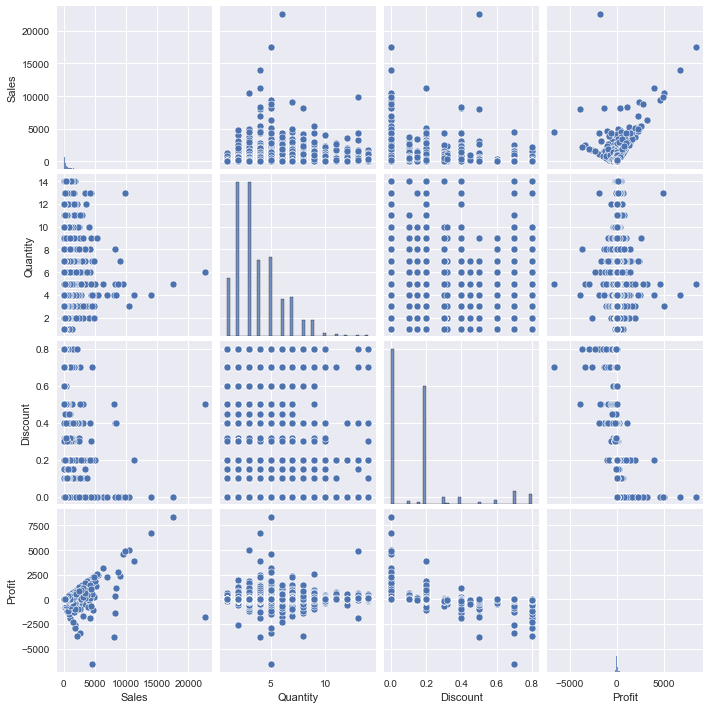

In [129]:
sns.pairplot(df)

1. As Discount increases Profit decreases
2. As Discount increases Sales decrease
3. As Sales increase Profit increases 

In [130]:
df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200469,-0.028625,0.479078
Quantity,0.200469,1.000000,0.008307,0.066089
Discount,-0.028625,0.008307,1.000000,-0.219939
Profit,0.479078,0.066089,-0.219939,1.000000


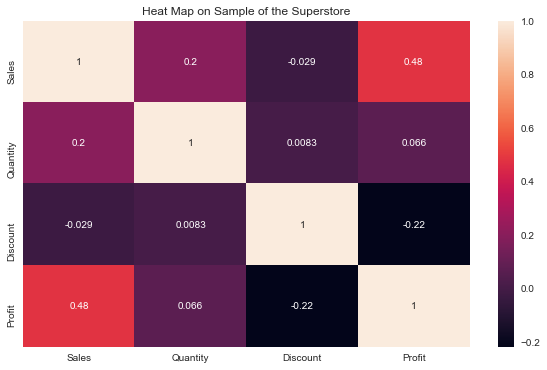

In [131]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)
plt.title("Heat Map on Sample of the Superstore")
plt.show()

1. Most correlation: Sales and Profit
2. Least correlation: Discount and Quantity

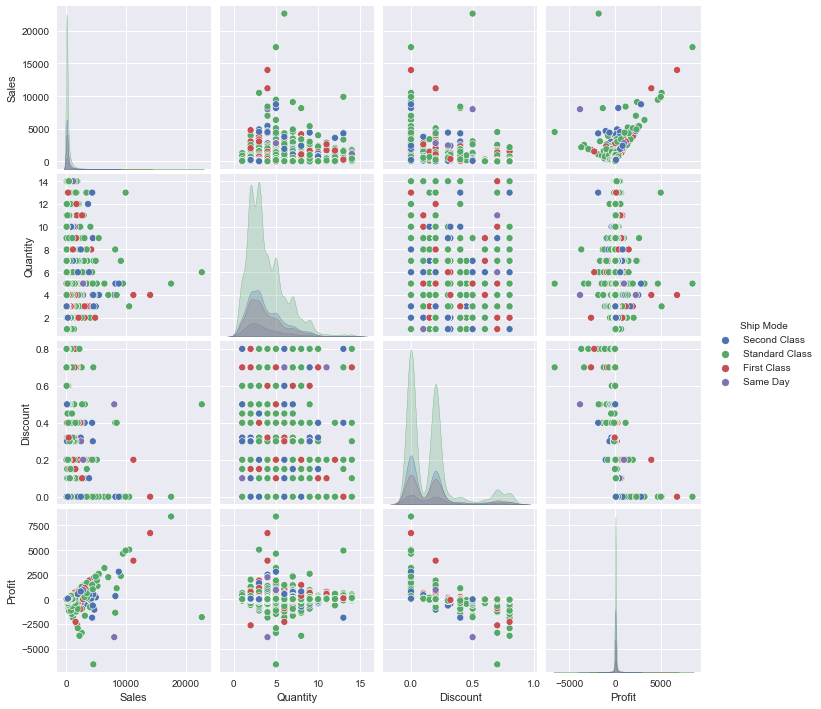

In [132]:
sns.pairplot(df, hue="Ship Mode")

In [133]:
df["Ship Mode"].value_counts()

Standard Class    5930
Second Class      1941
First Class       1531
Same Day           542
Name: Ship Mode, dtype: int64

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

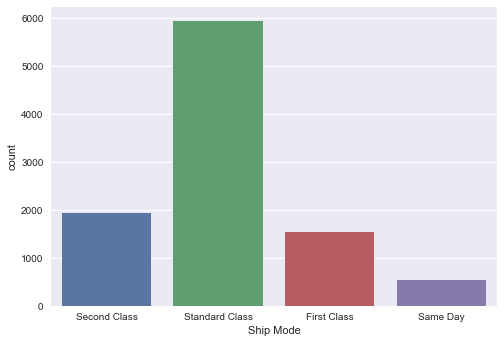

In [134]:
sns.countplot(x=df["Ship Mode"])

1. Most opted Ship Mode: Standard Class
2. Least opted Ship Mode: Same Day

In [135]:
ps=df.groupby("Ship Mode")[["Profit","Sales"]].sum()
ps

,Profit,Sales
Ship Mode,,
First Class,48910.4477,3.512746e+05
Same Day,15871.8869,1.283217e+05
Second Class,57425.5716,4.591240e+05
Standard Class,163889.6517,1.355879e+06


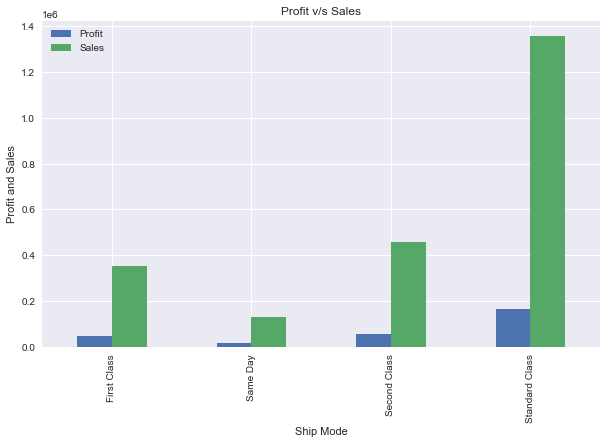

In [136]:
ps.plot(kind="bar", figsize=(10,6))
plt.title("Profit v/s Sales")
plt.ylabel("Profit and Sales")
plt.show()

1. Maximum Profit and Sales : Standard Class
2. Minimum Profit and Sales : Same Day

In [137]:
cat=df["Category"].value_counts()
cat

Office Supplies    5986
Furniture          2114
Technology         1844
Name: Category, dtype: int64

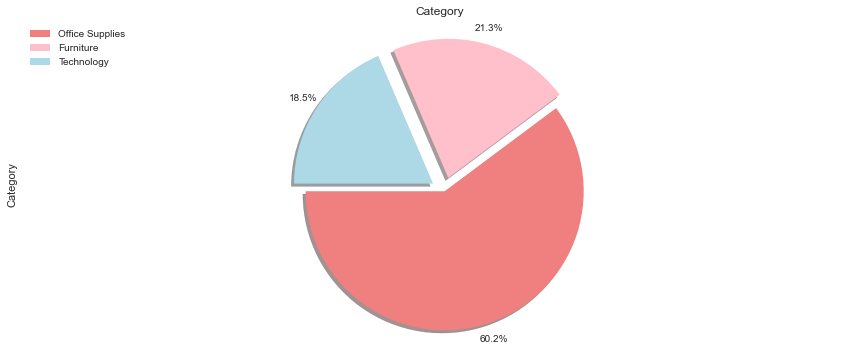

In [138]:
explode_list=[0,0.1,0.1]
colors_list=["lightcoral","pink","lightblue"]
cat.plot(kind="pie", figsize=(15,6),autopct="%1.1f%%",shadow=True, startangle=180, 
                                   explode=explode_list, labels=None, pctdistance=1.12, colors=colors_list)
plt.title("Category")
plt.axis("equal")
plt.legend(labels=cat.index,loc="upper left")
plt.show()

Major distribution of business is in Office Supplies and Least in Technology

In [139]:
#Category wise Sales
cs=df.groupby("Category").Sales.sum()
#Category wise Profit
cp=df.groupby("Category").Profit.sum()

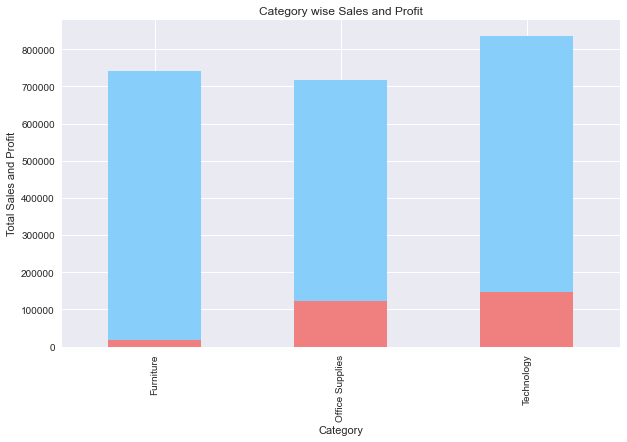

In [140]:
#Sales
ax0=cs.plot(kind="bar", figsize=(10,6), color="lightskyblue")

#Profit
ax0=cp.plot(kind="bar", figsize=(10,6), color="lightcoral")

ax0.set_title("Category wise Sales and Profit")
ax0.set_ylabel("Total Sales and Profit")

plt.show()

1. Maximum Profit and Sales in Category: Technology
2. Minimum Profit and Sales in Category: Office Supplies

### Sub-Category

In [141]:
sub=df["Sub-Category"].value_counts()
sub

Binders        1518
Paper          1344
Furnishings     954
Phones          888
Storage         845
Art             793
Accessories     773
Chairs          615
Appliances      466
Labels          359
Tables          319
Envelopes       254
Bookcases       226
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

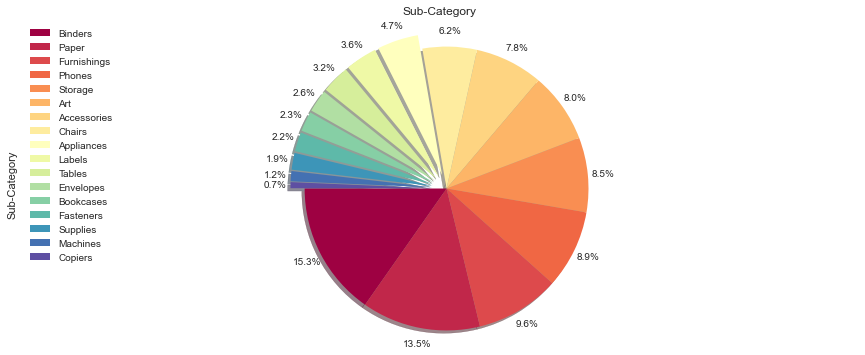

In [142]:
from matplotlib import cm
cmap = cm.get_cmap('Spectral')
explode_list=[0,0,0,0,0,0,0,0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
sub.plot(kind="pie", figsize=(15,6),autopct="%1.1f%%",shadow=True,startangle=180,
                                   explode=explode_list, labels=None, pctdistance=1.11,cmap=cmap)
plt.title("Sub-Category")
plt.axis("equal")
plt.legend(labels=sub.index,loc="upper left")
plt.show()

1. Major distribution of business is in Binders, Paper and Furnishings
2. Least distribution of business is in Copiers, Machines and Supplies

## Category and Sub-Category

In [143]:
x=df.groupby(["Category","Sub-Category"]).Sales.sum()
y=df.groupby(["Category","Sub-Category"]).Profit.sum()

### Sales

Text(0, 0.5, 'Sales')

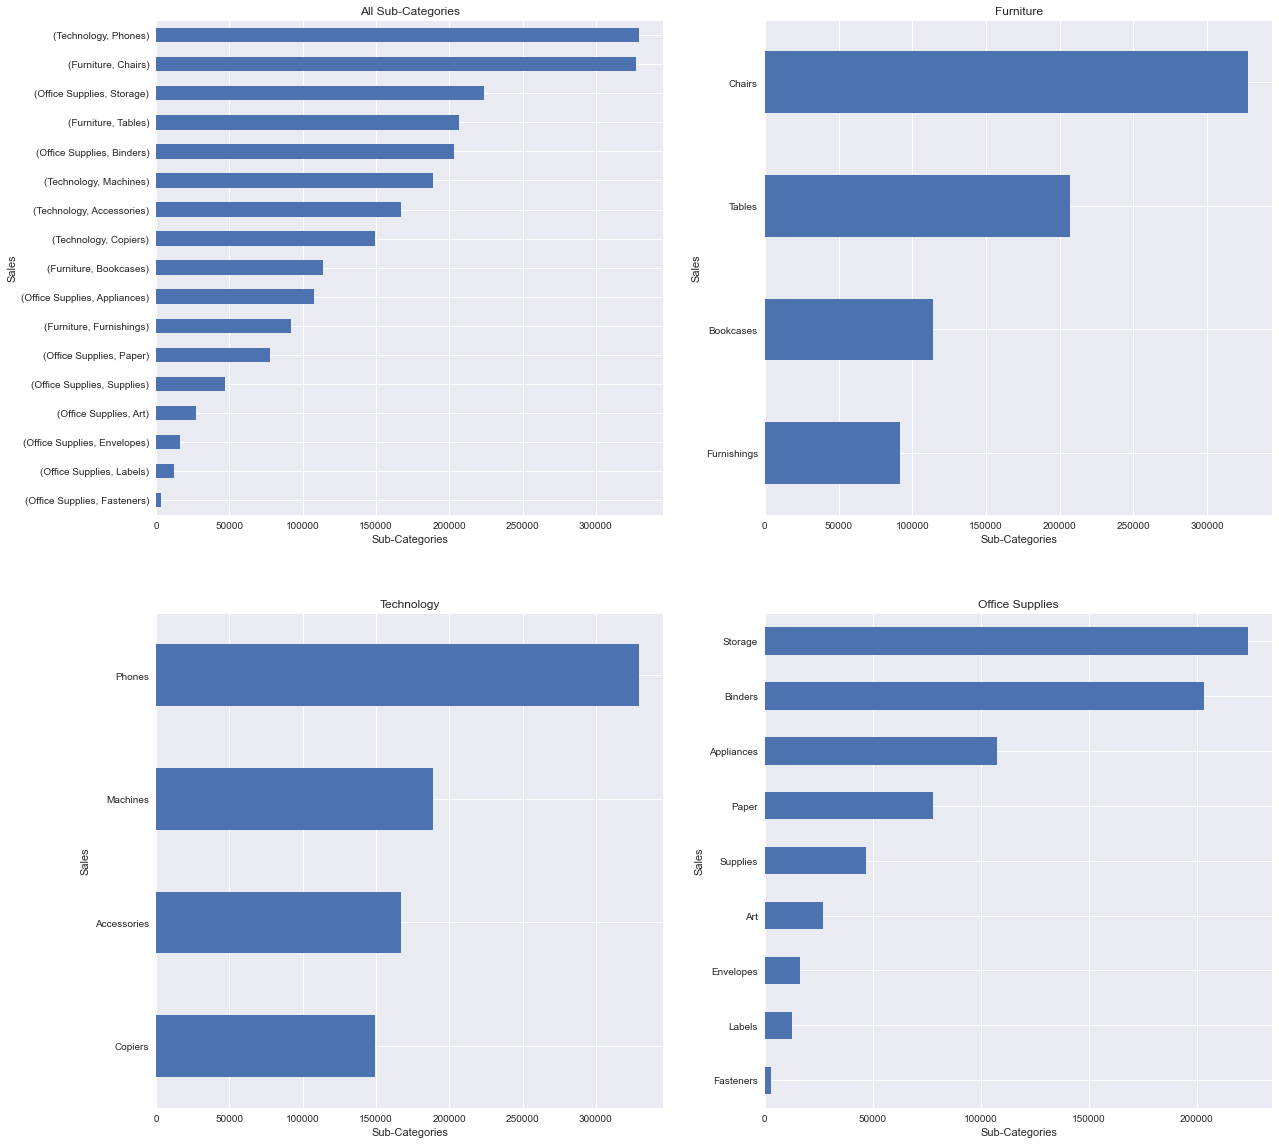

In [144]:
fig=plt.figure()
ax0=fig.add_subplot(2,2,1)
ax1=fig.add_subplot(2,2,2)
ax2=fig.add_subplot(2,2,3)
ax3=fig.add_subplot(2,2,4)

#Furniture
x["Furniture"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20),ax=ax1)
ax1.set_title("Furniture")
ax1.set_xlabel("Sub-Categories")
ax1.set_ylabel("Sales")

#Technology
x["Technology"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20),ax=ax2)
ax2.set_title("Technology")
ax2.set_xlabel("Sub-Categories")
ax2.set_ylabel("Sales")

#Office Supplies
x["Office Supplies"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20),ax=ax3)
ax3.set_title("Office Supplies")
ax3.set_xlabel("Sub-Categories")
ax3.set_ylabel("Sales")

#Total
x.sort_values(ascending=True).plot(kind="barh", figsize=(20,20),ax=ax0)
ax0.set_title("All Sub-Categories")
ax0.set_xlabel("Sub-Categories")
ax0.set_ylabel("Sales")

1. Maximum Sales in : Phones(Technology), Chairs(Furniture) and Storage(Office Supplies)
2. Minimum Sales in : Fasteners, Labels and Envelopes (Office Supplies)

### Profit

Text(0, 0.5, 'Profit')

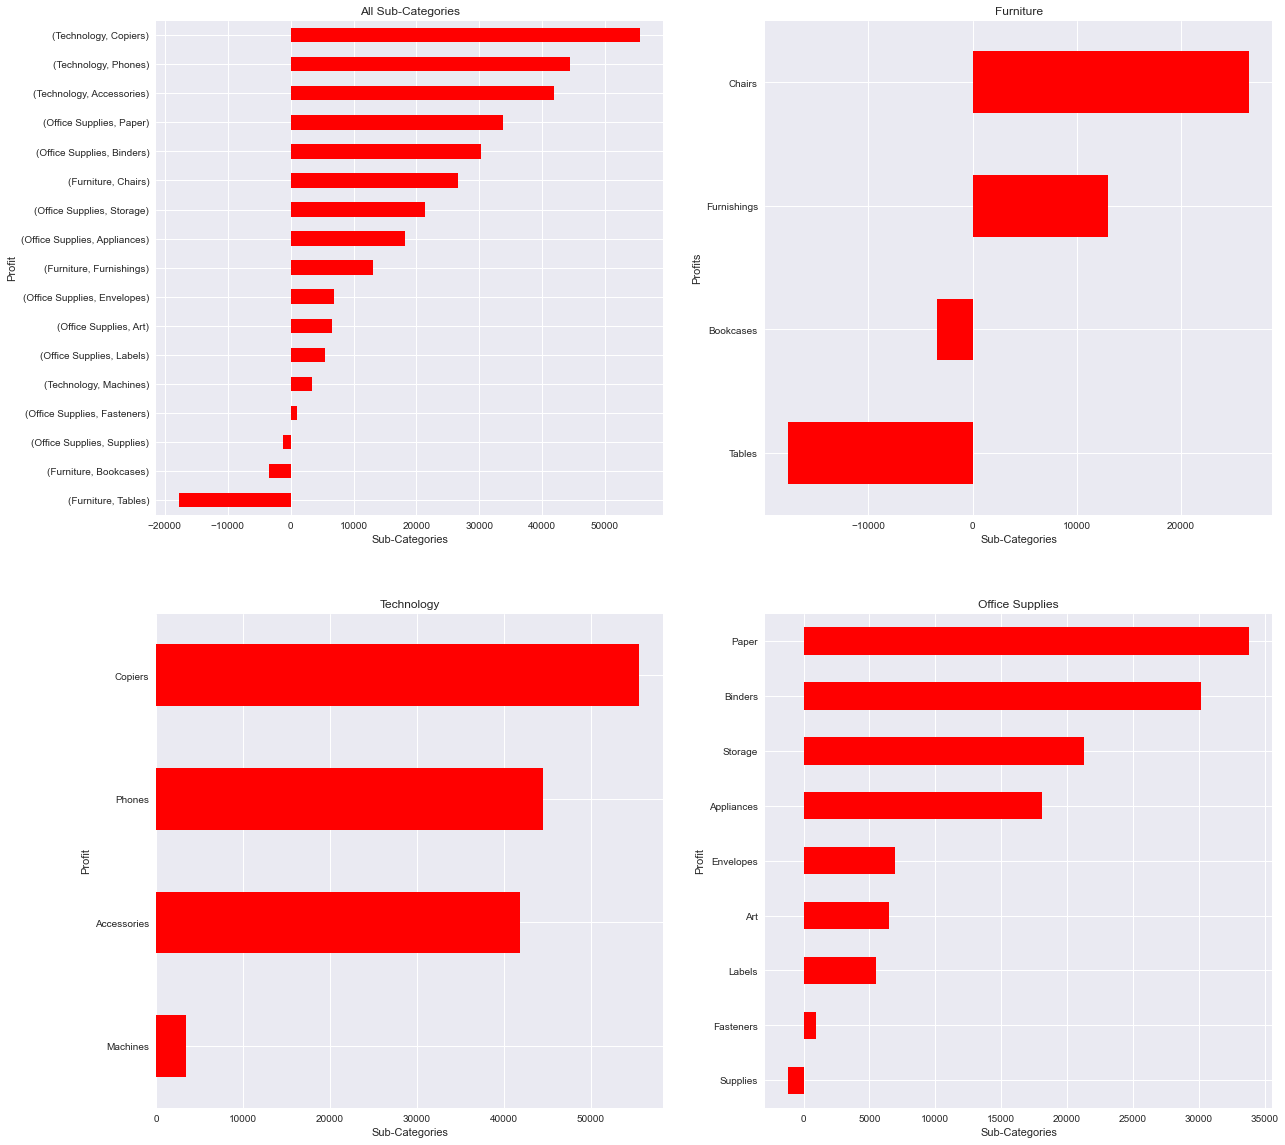

In [145]:
fig=plt.figure()
ax0=fig.add_subplot(2,2,1)
ax1=fig.add_subplot(2,2,2)
ax2=fig.add_subplot(2,2,3)
ax3=fig.add_subplot(2,2,4)
#Furniture
y["Furniture"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20),ax=ax1,color="red")
ax1.set_title("Furniture")
ax1.set_xlabel("Sub-Categories")
ax1.set_ylabel("Profits")

#Technology
y["Technology"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20),ax=ax2,color="red")
ax2.set_title("Technology")
ax2.set_xlabel("Sub-Categories")
ax2.set_ylabel("Profit")

#Office Supplies
y["Office Supplies"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20),ax=ax3,color="red")
ax3.set_title("Office Supplies")
ax3.set_xlabel("Sub-Categories")
ax3.set_ylabel("Profit")

#Total
y.sort_values(ascending=True).plot(kind="barh", figsize=(20,20),ax=ax0,color="red")
ax0.set_title("All Sub-Categories")
ax0.set_xlabel("Sub-Categories")
ax0.set_ylabel("Profit")

1. Maximum Profit in : Copiers, Phones and Accessories (Technology)
2. Loss in : Tables and Bookcases (Furniture) and Supplies (Office Supplies)

### Sales and Profit Combined

Text(0, 0.5, 'Profit')

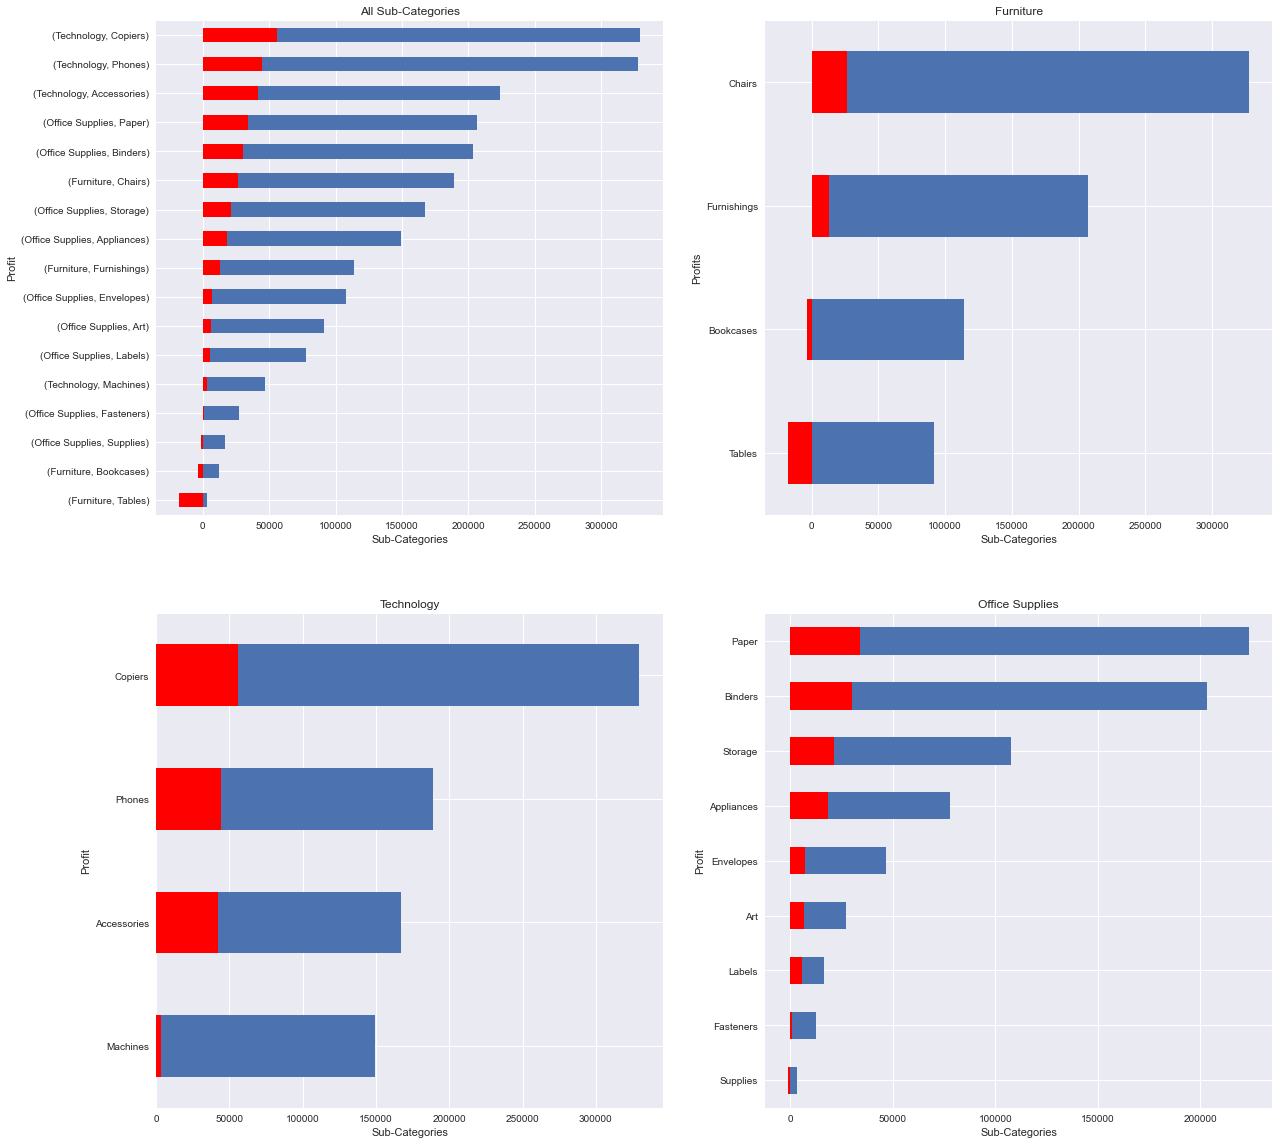

In [146]:
#Sales

fig=plt.figure()
ax0=fig.add_subplot(2,2,1)
ax1=fig.add_subplot(2,2,2)
ax2=fig.add_subplot(2,2,3)
ax3=fig.add_subplot(2,2,4)

#Furniture
x["Furniture"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20),ax=ax1,)
ax1.set_title("Furniture")
ax1.set_xlabel("Sub-Categories")
ax1.set_ylabel("Sales")

#Technology
x["Technology"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20),ax=ax2)
ax2.set_title("Technology")
ax2.set_xlabel("Sub-Categories")
ax2.set_ylabel("Sales")

#Office Supplies
x["Office Supplies"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20),ax=ax3)
ax3.set_title("Office Supplies")
ax3.set_xlabel("Sub-Categories")
ax3.set_ylabel("Sales")

#Total
x.sort_values(ascending=True).plot(kind="barh", figsize=(20,20),ax=ax0)
ax0.set_title("All Sub-Categories")
ax0.set_xlabel("Sub-Categories")
ax0.set_ylabel("Sales")

#Profit

#Furniture
y["Furniture"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20),ax=ax1,color="red")
ax1.set_title("Furniture")
ax1.set_xlabel("Sub-Categories")
ax1.set_ylabel("Profits")

#Technology
y["Technology"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20),ax=ax2,color="red")
ax2.set_title("Technology")
ax2.set_xlabel("Sub-Categories")
ax2.set_ylabel("Profit")

#Office Supplies
y["Office Supplies"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20),ax=ax3,color="red")
ax3.set_title("Office Supplies")
ax3.set_xlabel("Sub-Categories")
ax3.set_ylabel("Profit")

#Total
y.sort_values(ascending=True).plot(kind="barh", figsize=(20,20),ax=ax0,color="red")
ax0.set_title("All Sub-Categories")
ax0.set_xlabel("Sub-Categories")
ax0.set_ylabel("Profit")

1. Highest Sales and Profit in : Copiers, Phones and Accessories (Technology)
2. Lowest Sales and Profit in : Tables, Bookcases (Furniture) and Supplies (Office Supplies)

In [147]:
state=df["State"].value_counts()
state

California              1980
New York                1119
Texas                    980
Pennsylvania             581
Washington               502
Illinois                 490
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
South Carolina            42
Louisiana                 42
Nevada        

Text(0, 0.5, 'Number of Buyers')

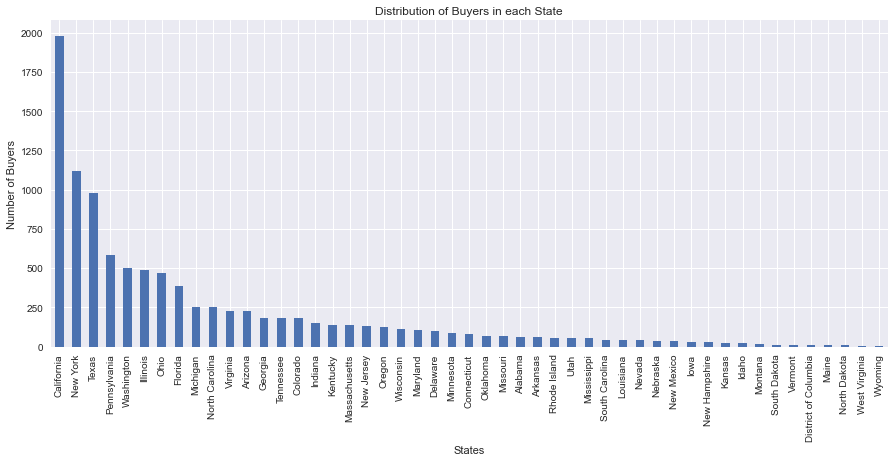

In [148]:
state.plot(kind="bar",figsize=(15,6))
plt.title("Distribution of Buyers in each State")
plt.xlabel("States")
plt.ylabel("Number of Buyers")

1. Most buyers belong to "California", "New York" and "Texas"
2. Least buyers belong to "Wyoming", "West Virginia" and "North Dakota"

In [149]:
ss=df.groupby(["State"]).Sales.sum()
sp=df.groupby(["State"]).Profit.sum()

Text(0, 0.5, 'Profit')

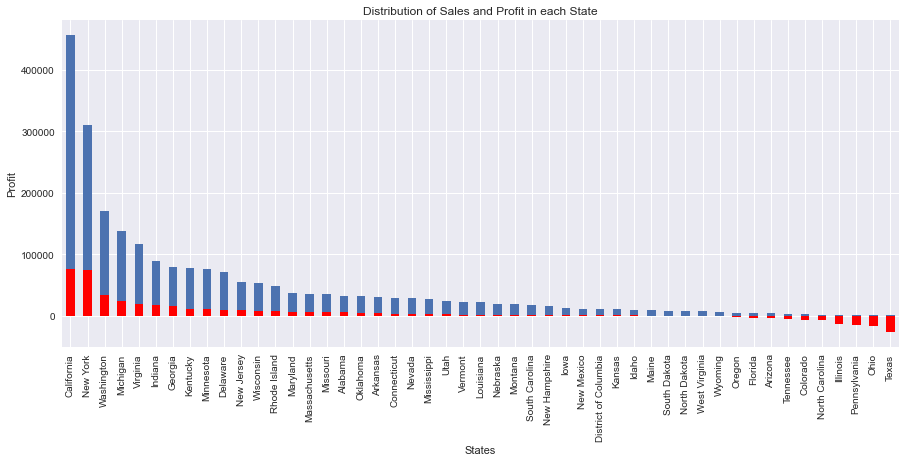

In [150]:
#State wise Distribution of Sales
ss.sort_values(ascending=False).plot(kind="bar",figsize=(15,6))
plt.xlabel("States")
plt.ylabel("Sales")

#State wise Distribution of Profit
sp.sort_values(ascending=False).sort_values(ascending=False).plot(kind="bar",figsize=(15,6),color="red")
plt.title("Distribution of Sales and Profit in each State")
plt.xlabel("States")
plt.ylabel("Profit")

1. Maximum Sales and Profit in cities: "California" and "New York" 
2. Minimum Sales and Profit in cities: "Oregon", "Florida" , "Arizona", "Tennessee", "Colorado",       "North Carolina", "Ilionis", "Pennsylvania", "Ohio" and "Texas" 

### Segment

In [151]:
seg=df["Segment"].value_counts()
seg

Consumer       5160
Corporate      3008
Home Office    1776
Name: Segment, dtype: int64

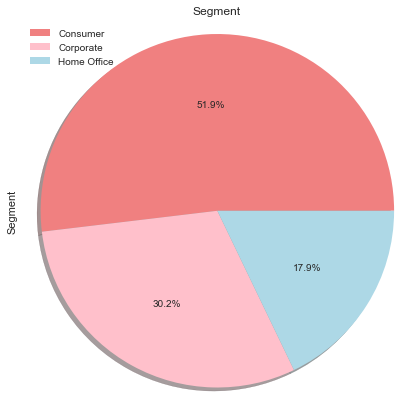

In [152]:
seg.plot(kind="pie",figsize=(7,7),autopct="%1.1f%%",
         shadow=True,labels=None,colors=["lightcoral","pink","lightblue"])
plt.title("Segment")
plt.legend(labels=seg.index,loc="upper left")
plt.axis("equal")
plt.show()

Major business distribution in Consumer Segment and Least in Home Office

### Sales and Profit in different segments

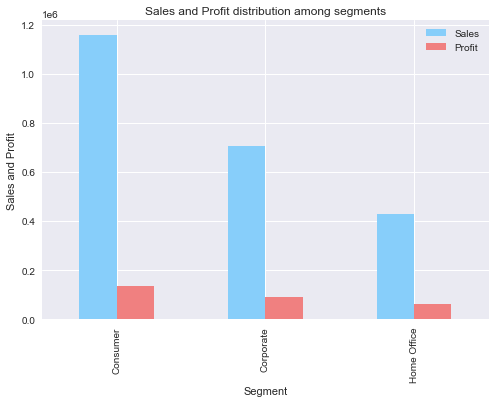

In [153]:
df.groupby("Segment")[["Sales","Profit"]].sum().plot(kind="bar",color=["lightskyblue","lightcoral"])
plt.ylabel("Sales and Profit")
plt.xlabel("Segment")
plt.title("Sales and Profit distribution among segments")
plt.show()

Most Profit and Sales in Consumer segment and least in Home Office

### Region

In [154]:
reg=df["Region"].value_counts()
reg

West       3177
East       2832
Central    2315
South      1620
Name: Region, dtype: int64

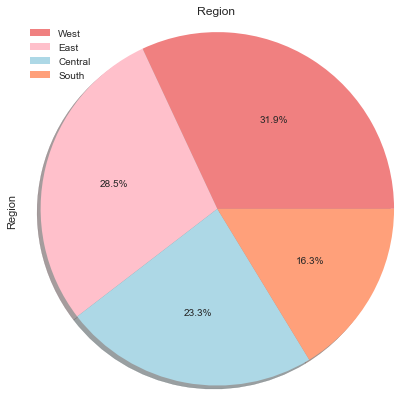

In [155]:
reg.plot(kind="pie",figsize=(7,7),autopct="%1.1f%%",
         shadow=True,labels=None, colors=["lightcoral","pink","lightblue","lightsalmon"])
plt.title("Region")
plt.legend(labels=reg.index,loc="upper left")
plt.axis("equal")
plt.show()

Company deals majorly in Western Region and least in Southern Region

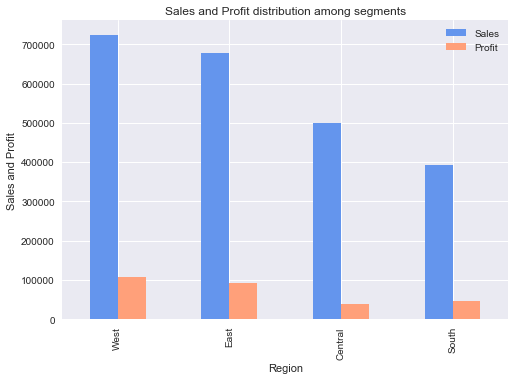

In [156]:
df.groupby("Region")[["Sales","Profit"]].sum().sort_values(by=["Sales","Profit"],ascending=False).plot(kind="bar",color=["cornflowerblue","lightsalmon"])
plt.ylabel("Sales and Profit")
plt.xlabel("Region")
plt.title("Sales and Profit distribution among segments")
plt.show()

More Profit from Western and Eastern Regions whereas lesser profits from Central and Southern regions

### Region wise Ship Mode

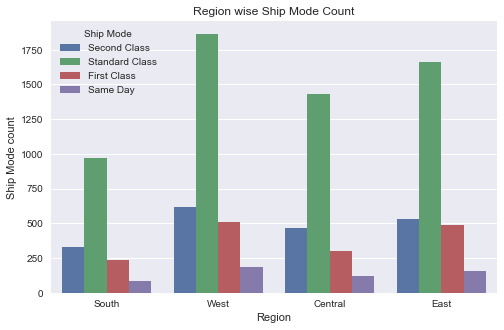

In [157]:
plt.figure(figsize=(8,5))
sns.countplot(x="Region", hue="Ship Mode", data=df)
plt.title("Region wise Ship Mode Count")
plt.ylabel("Ship Mode count")
plt.show()

1. Most opted mode : Standard Class and
2. Least opted mode: Same Day

### Relation between Profit and Discount

In [158]:
df["Discount"].corr(df["Profit"])

-0.21993898249765043

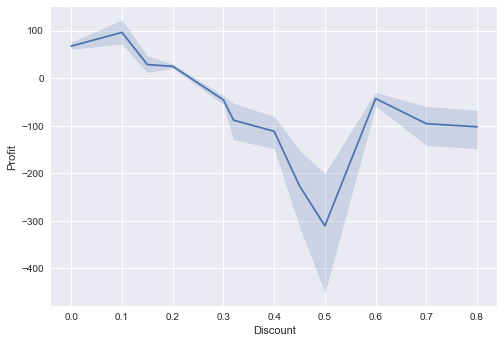

In [159]:
sns.lineplot(x="Discount",y="Profit",data=df)
plt.show()

Profit and Discount have negative relation,i.e, when one increases the other decreases

### Relation among Sales, Profit and Discount

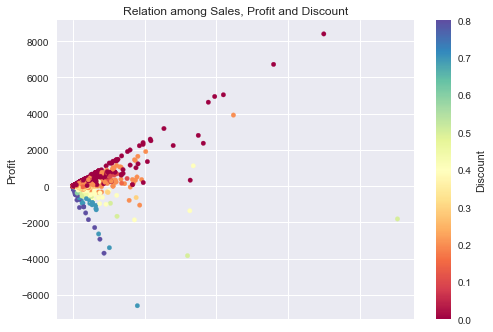

In [160]:
plt.style.use("seaborn")
df.plot(kind="scatter",x="Sales",y="Profit",c="Discount",colormap="Spectral")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.title("Relation among Sales, Profit and Discount")
plt.show()

1. As Discount increases Profit decreases
2. Discount and Sales have a lesser relation but Sales also decrease with increasing discount

## Observations

1.As Discount increases Profit decreases <br>
  As Discount increases Sales decrease <br>
  As Sales increase Profit increases 
  
2.Most correlation: Sales and Profit <br>
  Least correlation: Discount and Quantity
  
3.Most opted Ship Mode: Standard Class <br>
  Least opted Ship Mode: Same Day
  
4.Maximum Profit and Sales : Standard Class <br>
  Minimum Profit and Sales : Same Day
  
5.Major distribution of business is in Office Supplies and Least in Technology

6.Maximum Profit and Sales in Category: Technology <br>
  Minimum Profit and Sales in Category: Office Supplies

7.Major distribution of business is in Binders, Paper and Furnishings <br>
  Least distribution of business is in Copiers, Machines and Supplies

8.Highest Sales and Profit in : Copiers, Phones and Accessories (Technology) <br>
  Lowest Sales and Profit in : Tables, Bookcases (Furniture) and Supplies (Office Supplies)

9.Most buyers belong to "California", "New York" and "Texas" <br>
  Least buyers belong to "Wyoming", "West Virginia" and "North Dakota"

10.Maximum Sales and Profit in cities: "California" and "New York" <br>
   Minimum Sales and Profit in cities: "Oregon", "Florida" , "Arizona", "Tennessee", "Colorado",       "North Carolina", "Ilionis", "Pennsylvania", "Ohio" and "Texas" 
   
11.Major business distribution in Consumer Segment and Least in Home Office <br>
   Most Profit and Sales in Consumer segment and least in Home Office

13.Company deals majorly in Western Region and least in Southern Region <br>
   More Profit from Western and Eastern Regions whereas lesser profits from Central and Southern        regions.
   
14.Profit and Discount have negative relation,i.e, when one increases the other decreases 

15.As Discount increases Profit decreases <br>
   Discount and Sales have a lesser relation but Sales also decrease with increasing discount

## Conclusion

1. Cut on discounts to increase Profit and Sales
2. Focus on Standard Class more as it brings most profit and sales
3. Move the major distribution of business towards Technology(most profitable) rather than Office Supplies(least profitable)
4. Under Technology more focus should be given over Copiers, Phones and Accessories which bring maximum profit
5. Work to uplift sales in cities that are facing losses such as "Oregon", "Florida" , "Arizona", "Tennessee", "Colorado", "North Carolina", "Ilionis", "Pennsylvania", "Ohio" and "Texas" 
6. Keep focus over the cities with most buyers and most sales and profit, that are, "California" and "New york"
7. Consumer segment should be encouraged as it brings most sales and profit
8. Western and Eastern regions should be focussed upon for major chunk of sales and profit